In [1]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import pyprind
%matplotlib inline

In [2]:
os.chdir('scrapes')
os.getcwd()

'C:\\Users\\mburn\\OneDrive\\ds\\metis\\bootcamp\\projects\\metis_03-McNulty\\scrapes'

In [5]:
jar = []

for file in os.listdir():
    if file.split(' ')[-1]=='shelf.pkl':
        jar.append(file)

print(len(jar))

3170


In [6]:
records = []

progbar = pyprind.ProgBar(len(records))

for file in jar:
    #progbar.update()
    d = pickle.load(open(file, "rb" ))
    if len(d) != 0:
        records = records+ d

In [8]:
len(records)

1645097

In [9]:
cols = ['userid', 'shelf', 'review_url', 'title', 'author', 'avg_rating', 'times_rated', 'rating', 'comments', 'likes', 'date_added', 'isbn']
df = pd.DataFrame.from_records(records, columns = cols)
df['bookid'] = df.author + ' || ' +df.title
df.head()

,userid,shelf,review_url,title,author,avg_rating,times_rated,rating,comments,likes,date_added,isbn,bookid
0,1,adventure,/review/show/1087761751,Papillon,"Charrière, Henri",4.24,"47,157",4,0,3,"Oct 23, 2014",0061120669,"Charrière, Henri || Papillon"
1,1,adventure,/review/show/1063234077,Stardust,"Gaiman, Neil",4.08,"302,140",5,,,"Sep 24, 2014",iv></td>,"Gaiman, Neil || Stardust"
2,1,adventure,/review/show/359992088,Alif the Unseen,"Wilson, G. Willow",3.84,"14,087",3,,,"Jul 02, 2012",0802120202,"Wilson, G. Willow || Alif the Unseen"
3,1,adventure,/review/show/273133790,The Technologists,"Pearl, Matthew",3.50,"3,243",0,0,not set,"Feb 06, 2012",1400066573,"Pearl, Matthew || The Technologists"
4,1,adventure,/review/show/170000076,The Diamond Age,"Stephenson, Neal",4.19,"72,671",5,,,"May 21, 2011",iv></td>,"Stephenson, Neal || The Diamond Age"


In [10]:
print('unique shelves', len(df.shelf.unique()))
print('unique books', len(df.bookid.unique()))
print('unique users', len(df.userid.unique()))

unique shelves 18657
unique books 332274
unique users 1812


In [11]:
os.chdir('..')
df.to_csv('10-26 raw scrapes.csv')

In [2]:
df = pd.read_csv('10-26 raw scrapes.csv')

C:\Users\mburn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = df.drop_duplicates(subset=['userid', 'bookid'])
len(df)

1803900

In [4]:
df.head()

,Unnamed: 0,userid,shelf,review_url,title,author,avg_rating,times_rated,rating,comments,likes,date_added,isbn,bookid
0,0,11372510,favorites,/review/show/2471723375,"Saint's Blood (Greatcoats, #3)","de Castell, Sebastien",4.30,"4,417",5,0,1,"Jul 26, 2018",1782066802,"de Castell, Sebastien || Saint's Blood (Greatc..."
1,1,11372510,favorites,/review/show/2471723184,"Knight's Shadow (Greatcoats, #2)","de Castell, Sebastien",4.26,"6,630",5,0,3,"Jul 26, 2018",1782066772,"de Castell, Sebastien || Knight's Shadow (Grea..."
2,2,11372510,favorites,/review/show/2439946945,"Traitor's Blade (Greatcoats, #1)","de Castell, Sebastien",4.07,"12,790",5,NaN,NaN,"Jun 29, 2018",184866379X,"de Castell, Sebastien || Traitor's Blade (Grea..."
3,3,11372510,favorites,/review/show/2378103609,You Are a Badass: How to Stop Doubting Your Gr...,"Sincero, Jen",4.00,"73,220",5,NaN,NaN,"Apr 30, 2018",0762447699,"Sincero, Jen || You Are a Badass: How to Stop ..."
4,4,11372510,favorites,/review/show/2175881035,"Spectyr (Book of the Order, #2)","Ballantine, Philippa",3.88,"1,546",4,NaN,NaN,"Nov 06, 2017",0441020518,"Ballantine, Philippa || Spectyr (Book of the O..."


In [6]:
num_cols = ['avg_rating', 'times_rated', 'rating', 'comments', 'likes']

#df.times_rated = df.times_rated.apply(lambda x: x.replace(',',''))

for column in num_cols:
    df[column]= pd.to_numeric(df[column], errors='coerce')

df.fillna(0, inplace=True)

int_cols = num_cols[1:]
for col in int_cols:
    df[col]=df[col].astype(int, errors='ignore')

In [7]:
df.rating.value_counts()

 0       601880
 4       451319
 3       325837
 5       284550
 2       103041
 1        35807
 6          150
 7          108
 8           69
 9           60
 10          48
 11          34
 2010        28
 2003        23
 2007        23
 12          23
 2001        22
 1999        22
 2004        20
 2006        20
 2002        20
 1985        20
 1983        20
 1997        20
 1996        20
 13          19
 2009        19
 2008        19
 1992        18
 1993        18
          ...  
 1889         1
 33           1
 1858         1
 1856         1
 1854         1
 1844         1
 1818         1
 1892         1
-500          1
 1519         1
 1410         1
 197          1
 1220         1
 142          1
 110          1
 102          1
 89           1
 85           1
 67           1
 60           1
 59           1
 49           1
 47           1
 42           1
 40           1
 39           1
 37           1
 36           1
 35           1
 32           1
Name: rating, Length: 16

In [8]:
df=df[df.shelf != 'Read']
df=df[df.shelf != 'Want']
df=df[df.rating > 0]
df=df[df.rating < 6]

In [9]:
len(df)

1200554

In [10]:
df.isbn.value_counts()

iv></td>      226499
0439023483       753
0439554934       722
0451524934       677
0439139600       654
0545010225       651
043965548X       640
0439064864       636
0439023491       635
0439358078       631
0439785960       619
0439023513       606
0618260307       583
0061120081       573
0812550706       545
0452284244       496
0316015849       474
0316769177       470
038549081X       468
0060929871       454
0553588486       450
0525478817       446
0345391802       444
0804139024       440
0679783261       438
0618346252       410
0307277674       405
030788743X       403
0140283331       394
0340839937       387
               ...  
9023419677         1
2265067806         1
0691083886         1
0803732554         1
1419912461         1
1741798523         1
0978846060         1
8172154054         1
1400158362         1
0373011075         1
8834713958         1
1567318258         1
1622664949         1
3868385444         1
193154171X         1
0451465032         1
0811845265   

In [11]:
def isbn_hash(row):
    isbn= row['isbn']
    bookid =row['bookid']
    if isbn == 'iv></td>  ':
        isbn = 'hash_'+ hashlib.md5(bookid.encode('utf-8')).hexdigest()
    else:
        isbn = 'isbn_'+str(isbn)
    return isbn

In [12]:
a = df.apply(isbn_hash, axis=1)

df.isbn = a 

In [13]:
df.isbn.value_counts()

isbn_0439023483                          753
isbn_0439554934                          722
isbn_0451524934                          677
isbn_0439139600                          654
isbn_0545010225                          651
isbn_043965548X                          640
isbn_0439064864                          636
isbn_0439023491                          635
isbn_0439358078                          631
isbn_0439785960                          619
hash_cb38396eb08f54909e2439ed51c4efed    616
isbn_0439023513                          606
isbn_0618260307                          583
isbn_0061120081                          573
isbn_0812550706                          545
isbn_0452284244                          496
isbn_0316015849                          474
isbn_0316769177                          470
isbn_038549081X                          468
isbn_0060929871                          454
isbn_0553588486                          450
isbn_0525478817                          446
isbn_03453

TypeError: unsupported operand type(s) for -: 'str' and 'float'

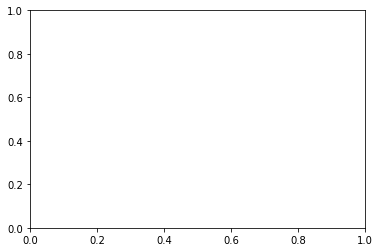

In [5]:
plt.bar(df.rating.value_counts().index, df.rating.value_counts().values)

In [51]:
os.chdir('..')
os.getcwd()

'/home/michael/OneDrive/ds/metis/bootcamp/projects/metis_03-McNulty'

In [16]:
df.to_csv('10-26 full cleaned df.csv')

In [18]:
df3 = df[['userid', 'isbn', 'rating']]
df3.head()

,userid,isbn,rating
0,11372510,isbn_1782066802,5
1,11372510,isbn_1782066772,5
2,11372510,isbn_184866379X,5
3,11372510,isbn_0762447699,5
4,11372510,isbn_0441020518,4


In [20]:
df3.to_csv('10-26 rating info.csv', index=False)

In [7]:
df[['userid', 'isbn', 'rating']].head()

,userid,isbn,rating
0,11372510,1782066802,5
1,11372510,1782066772,5
2,11372510,184866379X,5
3,11372510,0762447699,5
4,11372510,0441020518,4


In [9]:
len(df.userid.unique())

4093